In [1]:
using Oscar
using LinearAlgebra
using Polytropes

  ___   ____   ____    _    ____
 / _ \ / ___| / ___|  / \  |  _ \   |  Combining ANTIC, GAP, Polymake, Singular
| | | |\___ \| |     / _ \ | |_) |  |  Type "?Oscar" for more information
| |_| | ___) | |___ / ___ \|  _ <   |  Manual: https://docs.oscar-system.org
 \___/ |____/ \____/_/   \_\_| \_\  |  Version 1.2.2


# Tropical polytopes and weighted digraph polyhedra

In [2]:
G3 = graph_from_edges(Directed, [[1,2],[1,3],[2,3]])

Directed graph with 3 nodes and the following edges:
(1, 2)(1, 3)(2, 3)

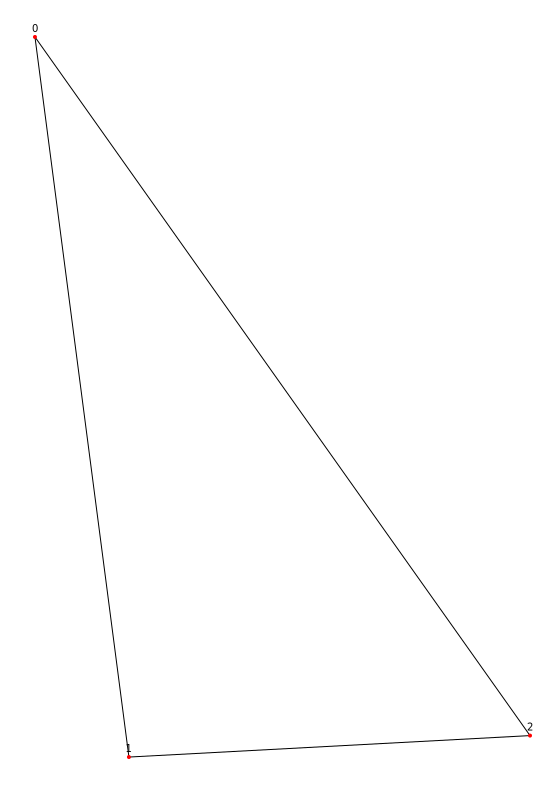

In [3]:
visualize(G3)

In [4]:
w3 = QQ.([1,1,1])
P3 = weighted_digraph_polyhedron(G3, w3)

Polyhedron in ambient dimension 2

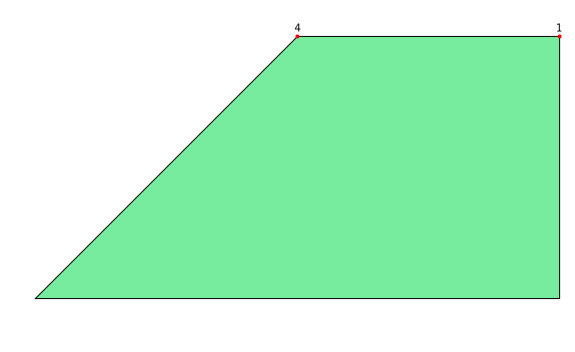

In [5]:
visualize(P3)

In [6]:
T = tropical_semiring()
A3trop = T[0 zero(T) zero(T); w3[1] 0 zero(T); w3[2] w3[3] 0]

[(0)     ∞     ∞]
[(1)   (0)     ∞]
[(1)   (1)   (0)]

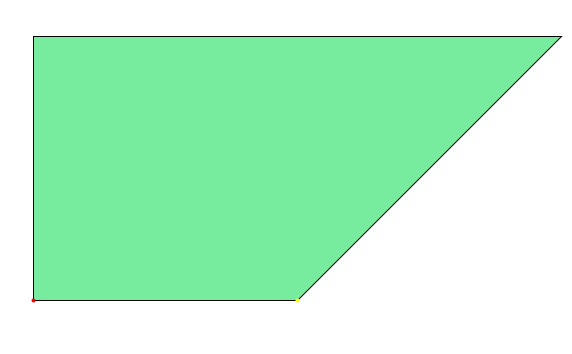

In [7]:
P3trop = Polymake.tropical.Polytope{min}(POINTS=A3trop)
Polymake.visual(P3trop)

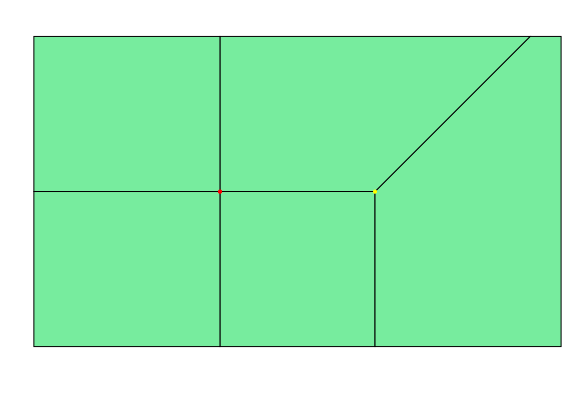

In [8]:
Polymake.tropical.visual_subdivision(P3trop)

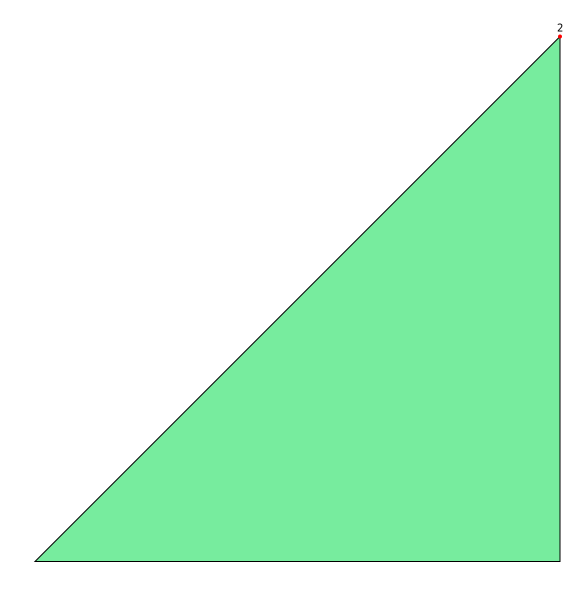

In [9]:
w3 = QQ.([1,3,1])
P3 = weighted_digraph_polyhedron(G3, w3)
visualize(P3)

In [13]:
A3trop = T[0 zero(T) zero(T); w3[1] 0 zero(T); w3[2] w3[3] 0]
A3trop^3

[(0)     ∞     ∞]
[(1)   (0)     ∞]
[(2)   (1)   (0)]

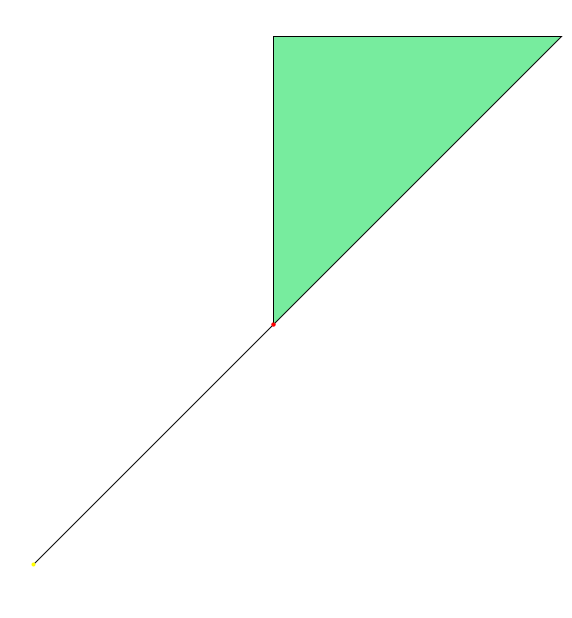

In [10]:
A3trop = T[0 zero(T) zero(T); w3[1] 0 zero(T); w3[2] w3[3] 0]
P3trop = Polymake.tropical.Polytope{min}(POINTS=A3trop)
Polymake.visual(P3trop)

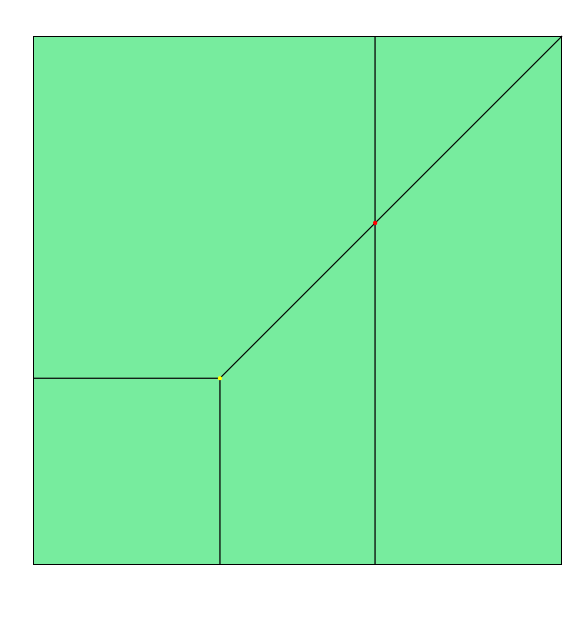

In [11]:
Polymake.tropical.visual_subdivision(P3trop)

# Getting secondary fans

In [20]:
function root_polytope(G::Graph{Directed})
    n = n_vertices(G)
    s = edges(G) .|> src
    t = edges(G) .|> dst
    
    return hcat(I[[s...,1:n...],1:n], I[[t...,1:n...],1:n])
end

root_polytope (generic function with 1 method)

In [15]:
A3 = root_polytope(G3)

6×6 Matrix{Bool}:
 1  0  0  0  1  0
 1  0  0  0  0  1
 0  1  0  0  0  1
 1  0  0  1  0  0
 0  1  0  0  1  0
 0  0  1  0  0  1

In [16]:
Γ3 = convex_hull(A3)

Polyhedron in ambient dimension 6

In [17]:
sfan3 = begin
    V = Polymake.polytope.PointConfiguration(POINTS=A3)
    Polymake.fan.secondary_fan(V) |> polyhedral_fan
end

Polyhedral fan in ambient dimension 6

In [18]:
dim(sfan3), lineality_dim(sfan3)

(6, 5)

In [19]:
R,L = reduce.(Ref(hcat), rays_modulo_lineality(sfan3) |> collect) .|> transpose

2-element Vector{Transpose{QQFieldElem, Matrix{QQFieldElem}}}:
 [-1 1 … 1 0; 1 -1 … -1 0]
 [1 1 … 0 0; -1 0 … 0 0; … ; 1 0 … 1 0; 0 0 … 0 1]

In [18]:
R

2×6 transpose(::Matrix{QQFieldElem}) with eltype QQFieldElem:
 1   -1  1   0  -1  0
 -1  1   -1  0  1   0

In [19]:
L

5×6 transpose(::Matrix{QQFieldElem}) with eltype QQFieldElem:
 1   1  0  0  0  0
 -1  0  1  0  0  0
 0   0  0  1  0  0
 1   0  0  0  1  0
 0   0  0  0  0  1

In [20]:
B = R + [1 1 0 1 0; 3 1 0 -1 0] * L 
B[:,1:3]

2×3 Matrix{QQFieldElem}:
 2  0  2
 0  4  0

Along the first ray, we have $a_{12} + a_{23} > a_{13} = 0 $, while along the second ray $a_{13} > a_{12} + a_{23} = 0$.

# Central subdivisions

In [21]:
function fundamental_polytope(G::Graph)
    A = root_polytope(G)
    
    n = n_vertices(G)
    m = n_edges(G)
    
    return A[1:m+1,n+1:end] - A[1:m+1,1:n]
end

fundamental_polytope (generic function with 1 method)

In [22]:
funP3 = fundamental_polytope(G3)[[4,1,2,3],:] |> convex_hull

Polyhedron in ambient dimension 3

In [23]:
vertices(funP3)

4-element SubObjectIterator{PointVector{QQFieldElem}}:
 [0, 0, 0]
 [-1, 1, 0]
 [-1, 0, 1]
 [0, -1, 1]

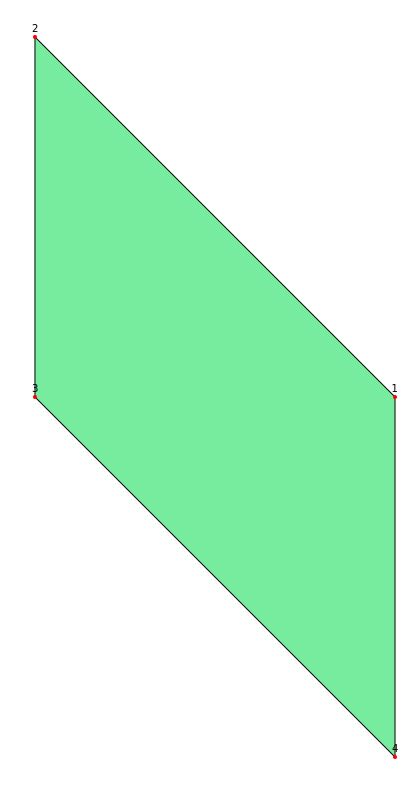

In [23]:
visualize(funP3)

In [26]:
S1 = subdivision_of_points(vertices(funP3), [0,w3...])

Subdivision of points in ambient dimension 3

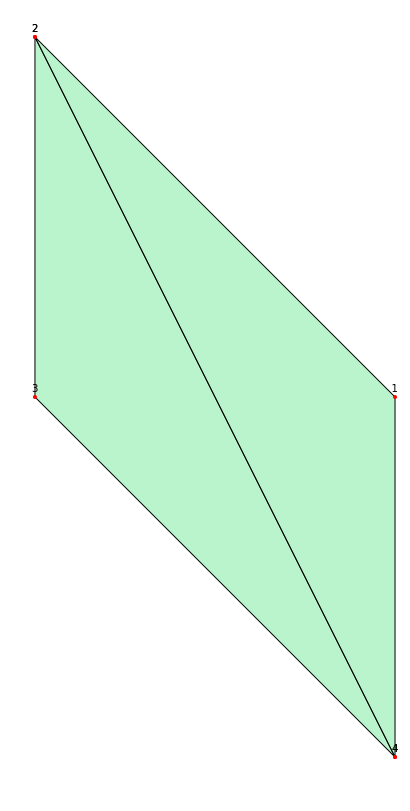

In [27]:
visualize(S1)

In [28]:
S2 = subdivision_of_points(vertices(funP3), [0,1,2,1])

Subdivision of points in ambient dimension 3

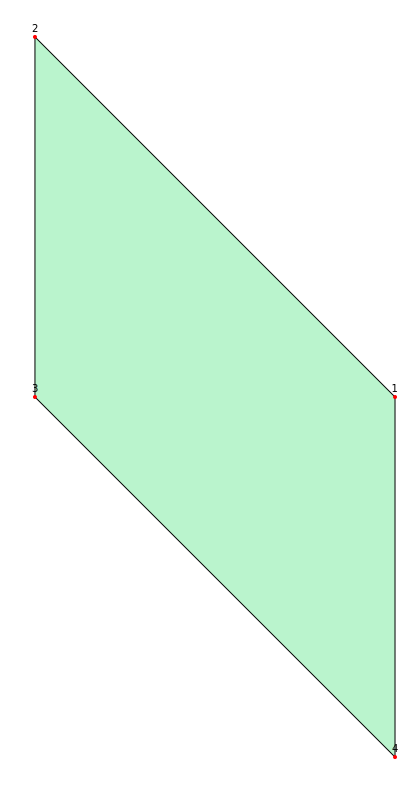

In [29]:
visualize(S2)

# $n = 4$

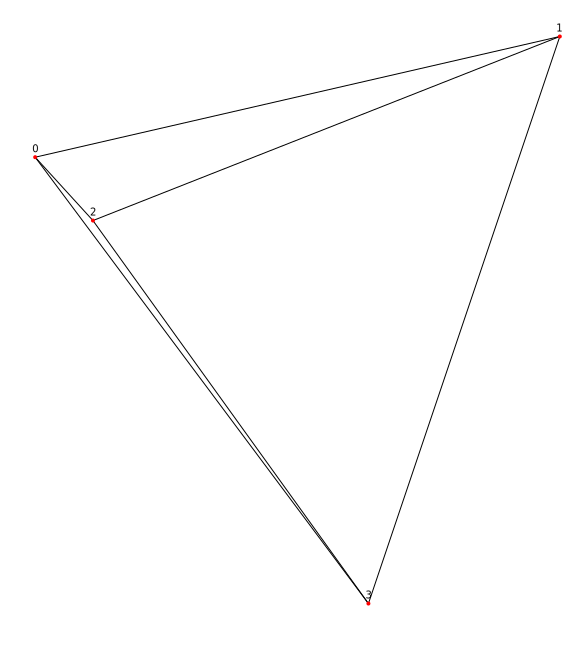

In [30]:
G4 = complete_dag(4)
visualize(G4)

In [31]:
Γ4 = root_polytope(G4)

10×8 Matrix{Bool}:
 1  0  0  0  0  1  0  0
 1  0  0  0  0  0  1  0
 1  0  0  0  0  0  0  1
 0  1  0  0  0  0  1  0
 0  1  0  0  0  0  0  1
 0  0  1  0  0  0  0  1
 1  0  0  0  1  0  0  0
 0  1  0  0  0  1  0  0
 0  0  1  0  0  0  1  0
 0  0  0  1  0  0  0  1

In [32]:
A4 = fundamental_polytope(G4)[[end, 1:end-1...],:]

7×4 Matrix{Int64}:
  0   0   0  0
 -1   1   0  0
 -1   0   1  0
 -1   0   0  1
  0  -1   1  0
  0  -1   0  1
  0   0  -1  1

In [33]:
B = hcat(ones(eltype(A4), n_edges(G4)+1), A4[:,2:end])

7×4 Matrix{Int64}:
 1   0   0  0
 1   1   0  0
 1   0   1  0
 1   0   0  1
 1  -1   1  0
 1  -1   0  1
 1   0  -1  1

In [37]:
sfan4 = begin
    #B = hcat(ones(eltype(A4), n_edges(G4)+1), A4[:,2:end])
    V = Polymake.polytope.PointConfiguration(POINTS=B)
    Polymake.fan.secondary_fan(V) |> polyhedral_fan
end

Polyhedral fan in ambient dimension 7

In [38]:
Oscar.pm_object(sfan4)

type: PolyhedralFan<Rational>

FAN_AMBIENT_DIM
	7

LINEALITY_SPACE
	(7) (1 1) (2 1) (3 1)
	1 1 1 0 1 0 0
	-1 -2 -1 0 0 1 0
	(7) (0 1) (1 1) (6 1)

MAXIMAL_CONES
	{0 1 2}
	{1 2 3}
	{0 2 4}
	{0 1 5}
	{1 3 5}
	{2 3 6}
	{2 4 7}
	{0 4 8}
	{0 5 8}
	{3 5 9}
	…

RAYS
	0 1 0 -1 -1 2 -1
	1 1/2 -1 1/2 -1/2 1 -3/2
	-1 3/2 -1 -1/2 1/2 1 -1/2
	1 -1/2 -1 3/2 1/2 -1 -1/2
	-1 1/2 1 -3/2 -1/2 1 1/2
	1 -1/2 0 1/2 -1/2 0 -1/2
	-1 1/2 -1 1/2 3/2 -1 1/2
	-1 -1/2 1 -1/2 1/2 -1 3/2
	0 -1 2 -1 -1 0 1
	1 -3/2 1 1/2 -1/2 -1 1/2

In [39]:
C = maximal_cones(IncidenceMatrix, sfan4)

16×10 IncidenceMatrix
[1, 2, 3]
[2, 3, 4]
[1, 3, 5]
[1, 2, 6]
[2, 4, 6]
[3, 4, 7]
[3, 5, 8]
[1, 5, 9]
[1, 6, 9]
[4, 6, 10]
[4, 7, 8]
[3, 7, 8]
[5, 8, 9]
[6, 9, 10]
[4, 8, 10]
[8, 9, 10]


In [40]:
R, L = reduce.(Ref(hcat), rays_modulo_lineality(sfan4) |> collect) .|> matrix

2-element Vector{QQMatrix}:
 [0 1 -1 1 -1 1 -1 -1 0 1; 1 1//2 3//2 -1//2 1//2 -1//2 1//2 -1//2 -1 -3//2; 0 -1 -1 -1 1 0 -1 1 2 1; -1 1//2 -1//2 3//2 -3//2 1//2 1//2 -1//2 -1 1//2; -1 -1//2 1//2 1//2 -1//2 -1//2 3//2 1//2 -1 -1//2; 2 1 1 -1 1 0 -1 -1 0 -1; -1 -3//2 -1//2 -1//2 1//2 -1//2 1//2 3//2 1 1//2]
 [0 1 -1 1; 1 1 -2 1; 1 1 -1 0; 1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]

## Producing weights from the secondary fan

In [41]:
R

[ 0       1      -1       1      -1       1     -1      -1    0       1]
[ 1    1//2    3//2   -1//2    1//2   -1//2   1//2   -1//2   -1   -3//2]
[ 0      -1      -1      -1       1       0     -1       1    2       1]
[-1    1//2   -1//2    3//2   -3//2    1//2   1//2   -1//2   -1    1//2]
[-1   -1//2    1//2    1//2   -1//2   -1//2   3//2    1//2   -1   -1//2]
[ 2       1       1      -1       1       0     -1      -1    0      -1]
[-1   -3//2   -1//2   -1//2    1//2   -1//2   1//2    3//2    1    1//2]

In [42]:
w = R[:,[4,7,10]] * QQ[1;1;1]
w .- w[1]

[    0]
[-5//2]
[   -2]
[ 3//2]
[ 1//2]
[   -4]
[-1//2]

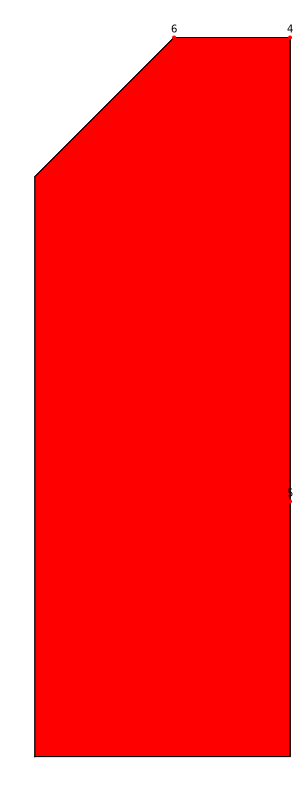

In [43]:
weighted_digraph_polyhedron(G4, w[2:end, 1]) |> visualize

## Snapping a picture of the secondary fan

In [44]:
function project_onto_orthogonal_complement(V, L)
    _, P = nullspace(matrix(L |> transpose))
    
    return V*P
end

project_onto_orthogonal_complement (generic function with 1 method)

In [45]:
Rred = project_onto_orthogonal_complement(transpose(R),L)

[ 0    4    0]
[ 0    0   -4]
[ 4    4    0]
[ 0   -4   -4]
[ 0    4    4]
[-2   -2   -2]
[ 4    0    0]
[ 0    0    4]
[-4    0    4]
[-4   -4    0]

In [46]:
red_sfan4 = polyhedral_fan(C, Rred)

Polyhedral fan in ambient dimension 3

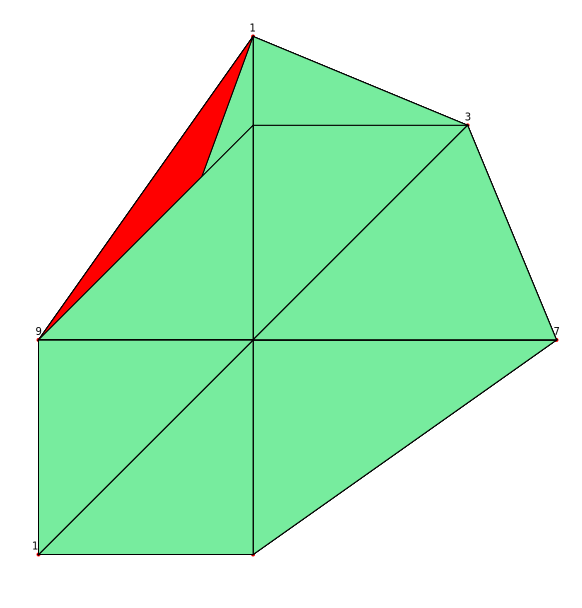

In [47]:
visualize(red_sfan4)

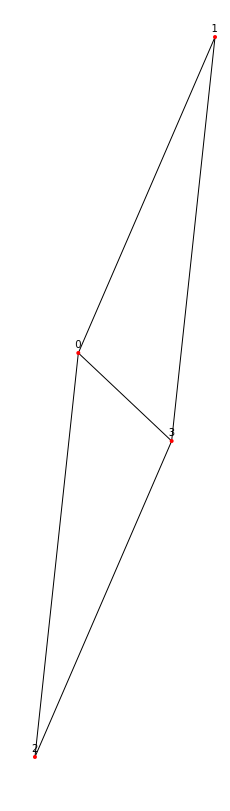

In [43]:
G4 = graph_from_edges(Directed, [[1,2],[1,3],[1,4],[2,4],[3,4]])
visualize(G4)

# Enumeration

In [48]:
GG = transitively_closed_acyclic_graphs(4)

16-element Vector{Graph{Directed}}:
 Directed graph with 4 nodes and 6 edges
 Directed graph with 4 nodes and 5 edges
 Directed graph with 4 nodes and 5 edges
 Directed graph with 4 nodes and 5 edges
 Directed graph with 4 nodes and 4 edges
 Directed graph with 4 nodes and 4 edges
 Directed graph with 4 nodes and 4 edges
 Directed graph with 4 nodes and 3 edges
 Directed graph with 4 nodes and 3 edges
 Directed graph with 4 nodes and 3 edges
 Directed graph with 4 nodes and 3 edges
 Directed graph with 4 nodes and 2 edges
 Directed graph with 4 nodes and 2 edges
 Directed graph with 4 nodes and 2 edges
 Directed graph with 4 nodes and 1 edges
 Directed graph with 4 nodes and no edges

In [49]:
funP = fundamental_polytope.(GG)

16-element Vector{Matrix{Int64}}:
 [-1 1 0 0; -1 0 1 0; … ; 0 0 -1 1; 0 0 0 0]
 [-1 0 1 0; -1 0 0 1; … ; 0 0 -1 1; 0 0 0 0]
 [-1 1 0 0; -1 0 1 0; … ; 0 0 -1 1; 0 0 0 0]
 [-1 1 0 0; -1 0 1 0; … ; 0 -1 0 1; 0 0 0 0]
 [-1 0 0 1; 0 -1 1 0; … ; 0 0 -1 1; 0 0 0 0]
 [-1 0 1 0; -1 0 0 1; … ; 0 -1 0 1; 0 0 0 0]
 [-1 1 0 0; -1 0 1 0; … ; 0 0 -1 1; 0 0 0 0]
 [0 -1 1 0; 0 -1 0 1; 0 0 -1 1; 0 0 0 0]
 [-1 0 0 1; 0 -1 0 1; 0 0 -1 1; 0 0 0 0]
 [-1 0 0 1; 0 -1 1 0; 0 -1 0 1; 0 0 0 0]
 [-1 1 0 0; -1 0 1 0; -1 0 0 1; 0 0 0 0]
 [0 -1 0 1; 0 0 -1 1; 0 0 0 0]
 [0 -1 1 0; 0 -1 0 1; 0 0 0 0]
 [-1 0 0 1; 0 -1 1 0; 0 0 0 0]
 [0 0 -1 1; 0 0 0 0]
 [0 0 0 0]

In [50]:
sfan = map(funP) do A
    B = hcat(ones(eltype(A), size(A,1)), A[:,2:end])
    V = Polymake.polytope.PointConfiguration(POINTS=B)
    Polymake.fan.secondary_fan(V) |> polyhedral_fan
end

16-element Vector{PolyhedralFan{QQFieldElem}}:
 Polyhedral fan in ambient dimension 7
 Polyhedral fan in ambient dimension 6
 Polyhedral fan in ambient dimension 6
 Polyhedral fan in ambient dimension 6
 Polyhedral fan in ambient dimension 5
 Polyhedral fan in ambient dimension 5
 Polyhedral fan in ambient dimension 5
 Polyhedral fan in ambient dimension 4
 Polyhedral fan in ambient dimension 4
 Polyhedral fan in ambient dimension 4
 Polyhedral fan in ambient dimension 4
 Polyhedral fan in ambient dimension 3
 Polyhedral fan in ambient dimension 3
 Polyhedral fan in ambient dimension 3
 Polyhedral fan in ambient dimension 2
 Polyhedral fan in ambient dimension 1

In [47]:
#regular_triangulations.(funP)

In [51]:
tri = map(funP) do A
    P = convex_hull(A)
    B = project_full(P)
    regular_triangulations(B)
end;
tri[1]

16-element Vector{Vector{Vector{Int64}}}:
 [[1, 2, 3, 4], [1, 3, 4, 5], [1, 3, 5, 6], [1, 4, 5, 6], [1, 4, 6, 7]]
 [[1, 2, 3, 4], [1, 3, 4, 5], [1, 3, 5, 6], [1, 4, 5, 7], [1, 5, 6, 7]]
 [[1, 2, 3, 5], [1, 2, 4, 5], [1, 3, 5, 6], [1, 4, 5, 6], [1, 4, 6, 7]]
 [[1, 2, 3, 4], [1, 3, 4, 6], [1, 4, 6, 7], [3, 4, 5, 6]]
 [[1, 2, 3, 6], [1, 2, 4, 6], [1, 4, 6, 7], [2, 3, 5, 6], [2, 4, 5, 6]]
 [[1, 2, 3, 5], [1, 2, 4, 5], [1, 3, 5, 6], [1, 4, 5, 7], [1, 5, 6, 7]]
 [[1, 2, 3, 4], [1, 3, 4, 7], [1, 3, 6, 7], [3, 4, 5, 6], [3, 4, 6, 7]]
 [[1, 2, 3, 6], [1, 2, 4, 6], [1, 4, 6, 7], [2, 3, 4, 6], [3, 4, 5, 6]]
 [[1, 2, 3, 4], [1, 3, 4, 7], [1, 3, 6, 7], [3, 4, 5, 7], [3, 5, 6, 7]]
 [[1, 2, 3, 7], [1, 3, 6, 7], [2, 3, 4, 7], [3, 4, 5, 6], [3, 4, 6, 7]]
 [[1, 2, 3, 6], [1, 2, 6, 7], [2, 3, 4, 6], [2, 4, 6, 7], [3, 4, 5, 6]]
 [[1, 2, 3, 5], [1, 2, 5, 7], [1, 3, 5, 6], [1, 5, 6, 7], [2, 4, 5, 7]]
 [[1, 2, 3, 6], [1, 2, 6, 7], [2, 3, 5, 6], [2, 4, 5, 6], [2, 4, 6, 7]]
 [[1, 2, 3, 7], [1, 3, 6, 7], [2, 3,

In [52]:
map(tri[1]) do t
    filter(x -> 7 in x, t)
end |> unique

10-element Vector{Vector{Vector{Int64}}}:
 [[1, 4, 6, 7]]
 [[1, 4, 5, 7], [1, 5, 6, 7]]
 [[1, 3, 4, 7], [1, 3, 6, 7], [3, 4, 6, 7]]
 [[1, 3, 4, 7], [1, 3, 6, 7], [3, 4, 5, 7], [3, 5, 6, 7]]
 [[1, 2, 3, 7], [1, 3, 6, 7], [2, 3, 4, 7], [3, 4, 6, 7]]
 [[1, 2, 6, 7], [2, 4, 6, 7]]
 [[1, 2, 5, 7], [1, 5, 6, 7], [2, 4, 5, 7]]
 [[1, 2, 3, 7], [1, 3, 6, 7], [2, 3, 4, 7], [3, 4, 5, 7], [3, 5, 6, 7]]
 [[1, 2, 6, 7], [2, 4, 5, 7], [2, 5, 6, 7]]
 [[1, 2, 3, 7], [1, 3, 6, 7], [2, 3, 5, 7], [2, 4, 5, 7], [3, 5, 6, 7]]

In [53]:
map(tri) do T
    m = maximum(vcat(T...) |> splat(vcat); init=0)
    map(T) do t
        filter(x -> m in x, t)
    end |> unique
end .|> length |> sum

38

In [54]:
map(1:4) do n
    G = transitively_closed_acyclic_graphs(n)
    funP = fundamental_polytope.(G)
    
    tri = map(funP) do A
        P = convex_hull(A)
        B = project_full(P)
        regular_triangulations(B)
    end
    
    map(tri) do T
        m = maximum(vcat(T...) |> splat(vcat); init=0)
        map(T) do t
            filter(x -> m in x, t)
        end |> unique
    end .|> length |> sum
end .+ 1

4-element Vector{Int64}:
  1
  2
  6
 39